In [15]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (53.1 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1

In [16]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.6MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702100 sha256=22376999fe9a80b25f38fc25177e1d9c3dae3b1f6464f22bf0ec696691fd555e
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
import numpy as np

In [0]:
bfire = pd.read_csv("/content/BushFire_weather.csv")

In [0]:
bfirec = bfire

In [0]:
bfirec.rename(columns={'windspeedKmph': 'windspeed','precipMM':'precip','maxtempC':'maxtemp','Sub Urban_x':'Suburbs'},inplace="TRUE")

In [6]:
bfirec.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'bright_ti4', 'scan', 'track',
       'acq_date', 'acq_time', 'satellite', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight', 'new lat', 'new long', 'Suburbs',
       'State', 'Region', 'Country', 'maxtemp', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise',
       'moonset', 'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precip',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeed'],
      dtype='object')

In [7]:
bfire.Country.unique()

array(['AU'], dtype=object)

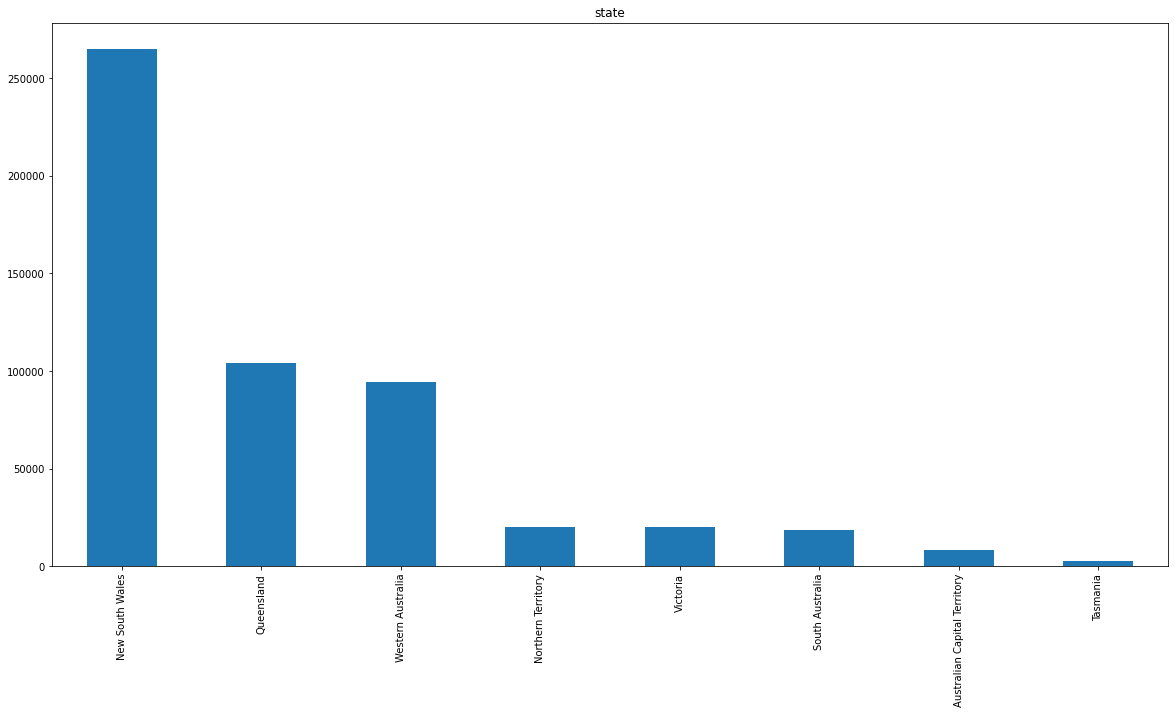

In [8]:
a=bfirec['State'].value_counts().plot(kind='bar',figsize=(20,10),title="state")
plt.savefig('State.jpg')

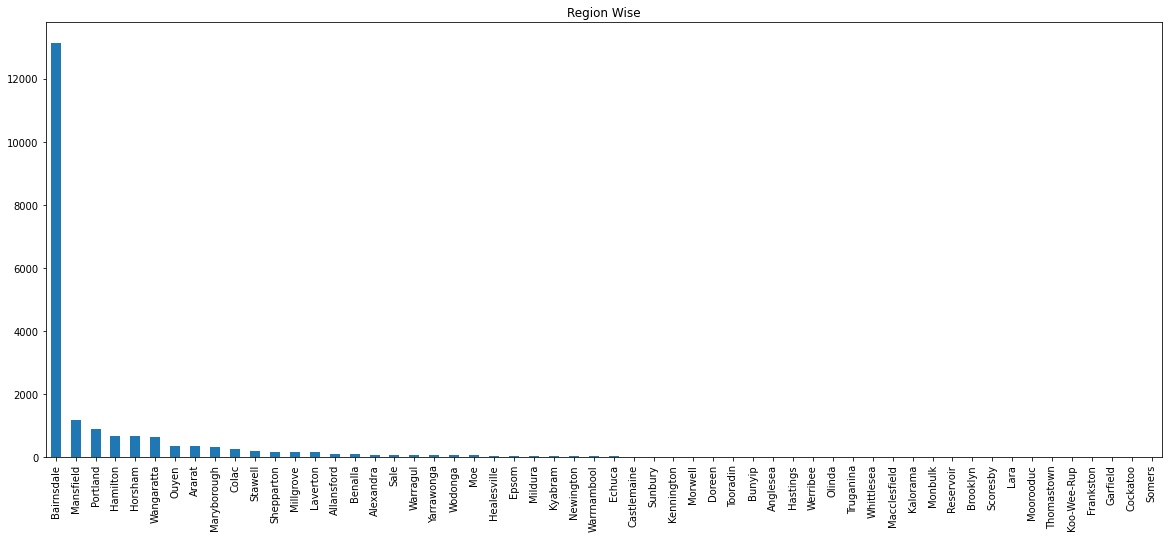

In [9]:
VIC =  bfirec[bfirec['State']=='Victoria']
B=VIC['Suburbs'].value_counts().plot(kind='bar',figsize=(20,8),title='Region Wise')
plt.savefig('Victoria.jpg')

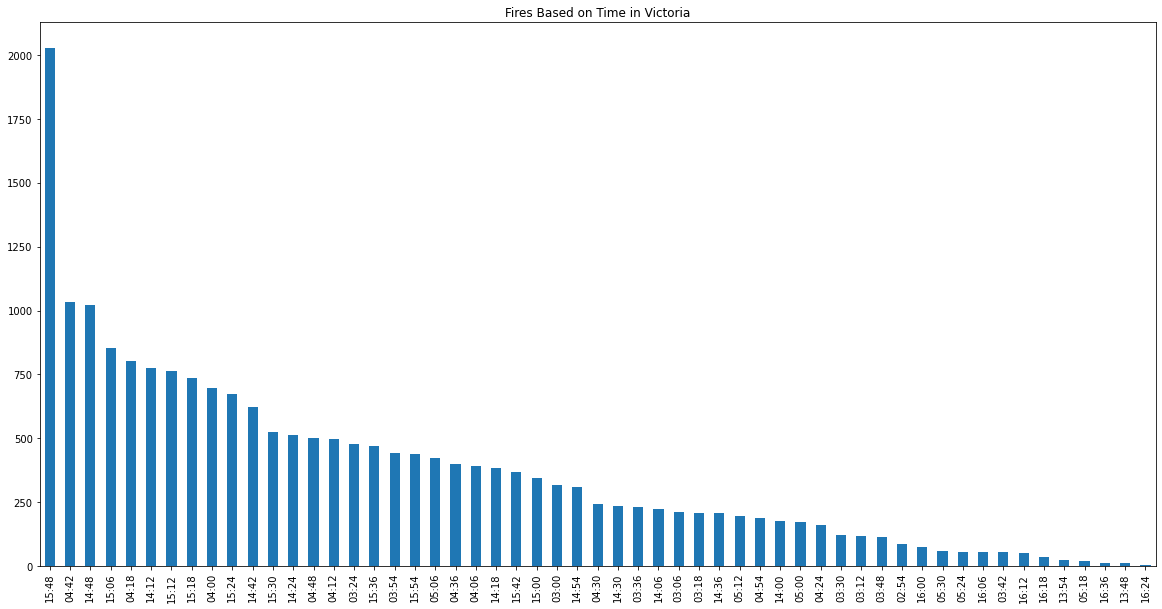

In [10]:
VIC['acq_time'].value_counts().plot(kind='bar',figsize=(20,10),title="Fires Based on Time in Victoria")

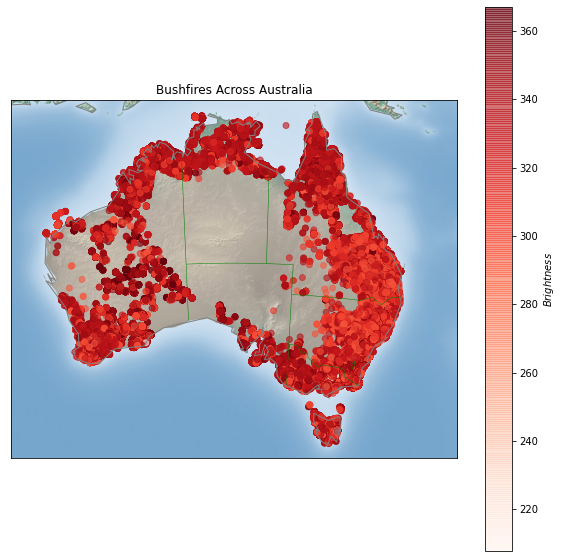

In [11]:
lat = bfirec['latitude'].values
lon = bfirec['longitude'].values
brg = bfirec['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='green')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Bushfires Across Australia")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Australian Bushfires.jpg')

In [0]:
main_hot = bfirec[bfirec['bright_ti4']>=367]

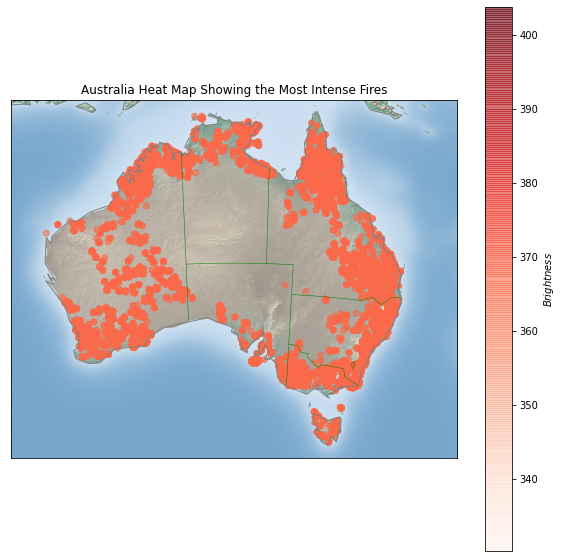

In [13]:
lat = main_hot['latitude'].values
lon = main_hot['longitude'].values
brg = main_hot['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Australia Heat Map Showing the Most Intense Fires")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Most Intense Fires.jpg')

In [14]:
DF = bfire[['frp','acq_date','Suburbs','maxtemp','State','humidity','precip','windspeed']]
DF['year'] = pd.DatetimeIndex(DF['acq_date']).year
DF['month'] = pd.DatetimeIndex(DF['acq_date']).month
DF['day'] = pd.DatetimeIndex(DF['acq_date']).day
del DF['acq_date']
data = DF

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [15]:
data['Suburbs'].nunique()


446

In [0]:
cat_vars=['Suburbs','State']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Suburbs','State']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [17]:
data_final=data[to_keep]
data_final.columns.values

array(['frp', 'maxtemp', 'humidity', 'precip', 'windspeed', 'year',
       'month', 'day', 'Suburbs_Alexandra', 'Suburbs_Allansford',
       'Suburbs_Alyangula', 'Suburbs_Anglesea', 'Suburbs_Ararat',
       'Suburbs_Ardrossan', 'Suburbs_Armidale', 'Suburbs_Ascot',
       'Suburbs_Atherton', 'Suburbs_Augusta', 'Suburbs_Australind',
       'Suburbs_Ayr', 'Suburbs_Bairnsdale', 'Suburbs_Balaklava',
       'Suburbs_Ballina', 'Suburbs_Beaconsfield', 'Suburbs_Bedfordale',
       'Suburbs_Bega', 'Suburbs_Bellingen', 'Suburbs_Benalla',
       'Suburbs_Bermagui', 'Suburbs_Berridale', 'Suburbs_Berriedale',
       'Suburbs_Berrigan', 'Suburbs_Berry', 'Suburbs_Bertram',
       'Suburbs_Beverley', 'Suburbs_Biloela', 'Suburbs_Bingara',
       'Suburbs_Birdwood', 'Suburbs_Birkenhead', 'Suburbs_Blackheath',
       'Suburbs_Blackwater', 'Suburbs_Blaxland', 'Suburbs_Blayney',
       'Suburbs_Boambee', 'Suburbs_Boggabilla', 'Suburbs_Boggabri',
       'Suburbs_Bomaderry', 'Suburbs_Bombala', 'Suburbs_Bongar

In [0]:
feature = data_final.loc[:, data_final.columns != 'Suburbs_Bairnsdale']
Y = data_final.loc[:, data_final.columns == 'Suburbs_Bairnsdale']

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Features Reduction
ETC = ExtraTreesClassifier()
ETC = ETC.fit(feature, Y)

model = SelectFromModel(ETC, prefit=True)
X = model.transform(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [20]:
data.shape

(533997, 464)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**RANDOM FOREST CLASSIFIER**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy --  99.99775280898876


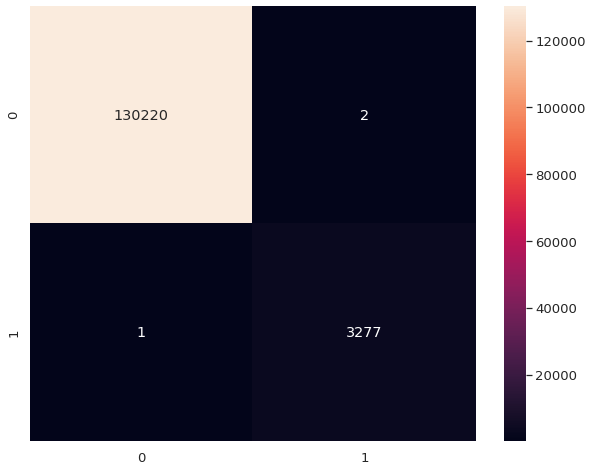

In [23]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

print("Accuracy -- ", RFC.score(X_test, y_test)*100)

cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

**LOGISTIC REGRESSION MODEL**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [26]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[156115    163]
 [  3858     64]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    156278
           1       0.28      0.02      0.03      3922

    accuracy                           0.97    160200
   macro avg       0.63      0.51      0.51    160200
weighted avg       0.96      0.97      0.96    160200



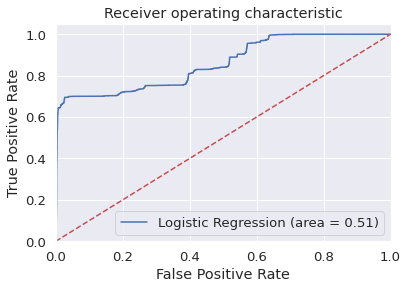

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**KNN MODEL**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y1_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
print('Accuracy of knn model on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of knn model on test set: 1.00


In [31]:
cm2 = confusion_matrix(y_test, y1_pred)
print(cm2)

[[156153    125]
 [   194   3728]]


In [32]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156278
           1       0.97      0.95      0.96      3922

    accuracy                           1.00    160200
   macro avg       0.98      0.97      0.98    160200
weighted avg       1.00      1.00      1.00    160200

